In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path = './'
filename = 'joined_nufus.csv' 

df = pd.read_csv(path+filename)

df.head()

,fid,tesis_adi,il_adi,sokak_adi,ilce_adi,mahalle_adi,area,num_of_buildings_between_0_15,num_of_buildings_between_15_30,num_of_buildings_between_30_50,mahalle_nüfus
0,3608,Gönüllü Çay Bahçesi ve Yeşil Alan,İSTANBUL,KALPAZANKAYA YOLU,ADALAR,BURGAZADA,1452.9154,7,8,10,1501.0
1,3602,Egemen Bahçe Yeşil Alan,İSTANBUL,BARBAROS HAYRETTİN,ADALAR,BURGAZADA,1303.5400,15,8,13,1501.0
2,3603,Sait Faik Abasıyanık Müzesi Önü Park Alanı,İSTANBUL,BARBAROS HAYRETTİN,ADALAR,BURGAZADA,430.3347,6,5,16,1501.0
3,3604,İnönü Parkı (Aynı Zamanda TRANSFER ALANIDIR.),İSTANBUL,ÇAM LİMANI YOLU,ADALAR,HEYBELİADA,2633.6610,14,7,7,4025.0
4,3600,Bayraktepe Çocuk Parkı + Top Sahası,İSTANBUL,BUKET,ADALAR,HEYBELİADA,554.7386,1,1,2,4025.0


In [11]:
df.isnull().sum()

fid                                0
tesis_adi                          0
il_adi                             0
sokak_adi                          0
ilce_adi                           0
mahalle_adi                        0
area                               0
num_of_buildings_between_0_15      0
num_of_buildings_between_15_30     0
num_of_buildings_between_30_50     0
mahalle_nüfus                     24
dtype: int64

<Axes: xlabel='mahalle_nüfus', ylabel='Count'>

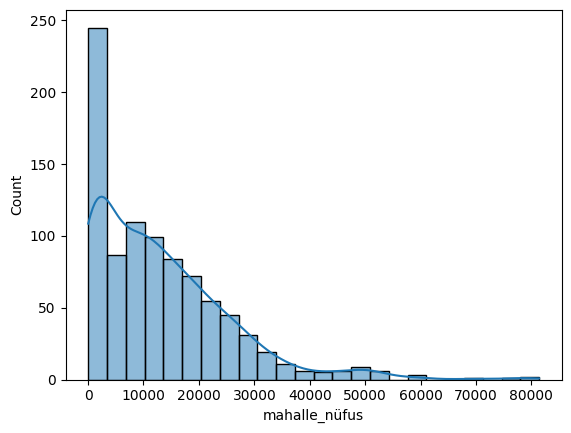

In [17]:
sns.histplot(data=df[['mahalle_adi','mahalle_nüfus']].drop_duplicates(), x="mahalle_nüfus", kde=True)

In [19]:
df.describe()

,fid,area,num_of_buildings_between_0_15,num_of_buildings_between_15_30,num_of_buildings_between_30_50,mahalle_nüfus
count,5577.000000,5.577000e+03,5577.000000,5577.000000,5577.000000,5553.000000
mean,2789.000000,8.399469e+03,6.279720,5.989242,10.251569,20643.960202
std,1610.085557,3.614452e+04,7.370713,7.087653,11.507811,14979.321333
min,1.000000,1.141579e+02,1.000000,0.000000,0.000000,21.000000
25%,1395.000000,1.348478e+03,1.000000,1.000000,1.000000,10211.000000
50%,2789.000000,2.671106e+03,4.000000,4.000000,7.000000,18115.000000
75%,4183.000000,5.971825e+03,9.000000,9.000000,15.000000,26906.000000
max,5577.000000,1.464614e+06,143.000000,65.000000,115.000000,81388.000000


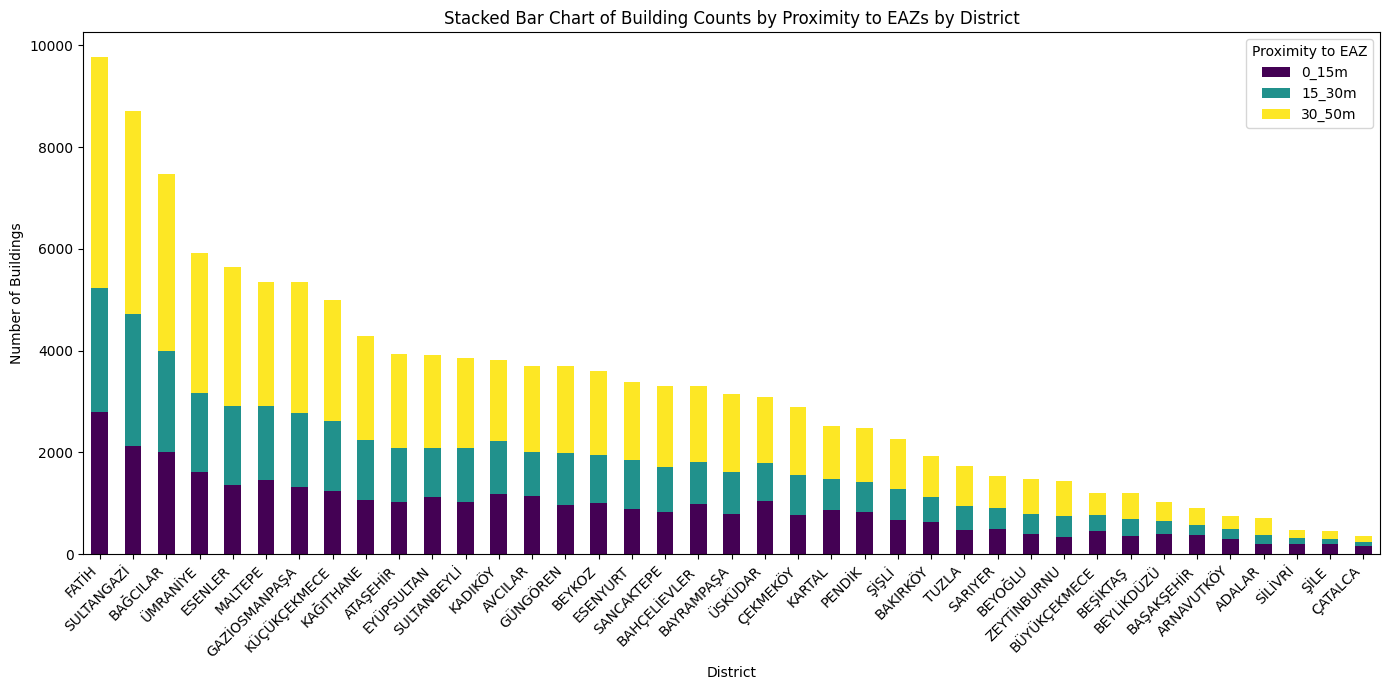

In [26]:
df_building_counts = df[['ilce_adi','num_of_buildings_between_0_15','num_of_buildings_between_15_30','num_of_buildings_between_30_50']]
df_building_counts = df_building_counts.rename(columns={
    'num_of_buildings_between_0_15': '0_15m',
    'num_of_buildings_between_15_30': '15_30m',
    'num_of_buildings_between_30_50': '30_50m',
    'ilce_adi':'District'
})
grouped = df_building_counts.groupby('District')[['0_15m', '15_30m', '30_50m']].sum()

# Optional: sort by total building count (largest first)
grouped['total'] = grouped.sum(axis=1)
grouped = grouped.sort_values(by='total', ascending=False)
grouped.drop(columns='total', inplace=True)

# Plot stacked bar chart
grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='viridis'
)

plt.title("Stacked Bar Chart of Building Counts by Proximity to EAZs by District")
plt.xlabel("District")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Proximity to EAZ")
plt.show()

In [10]:

# OPTIONAL: Choose numeric columns only (adjust if needed)
numeric_cols = df.select_dtypes(include='number').columns
X = df[numeric_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-Means
k = 3  # You can change this based on your needs or use elbow method to find best k
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Summary
print(df['cluster'].value_counts())

# Optional: Plot (only if data is 2D or reduced to 2D)
if X_scaled.shape[1] == 2:
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
    plt.title("K-Means Clustering")
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values